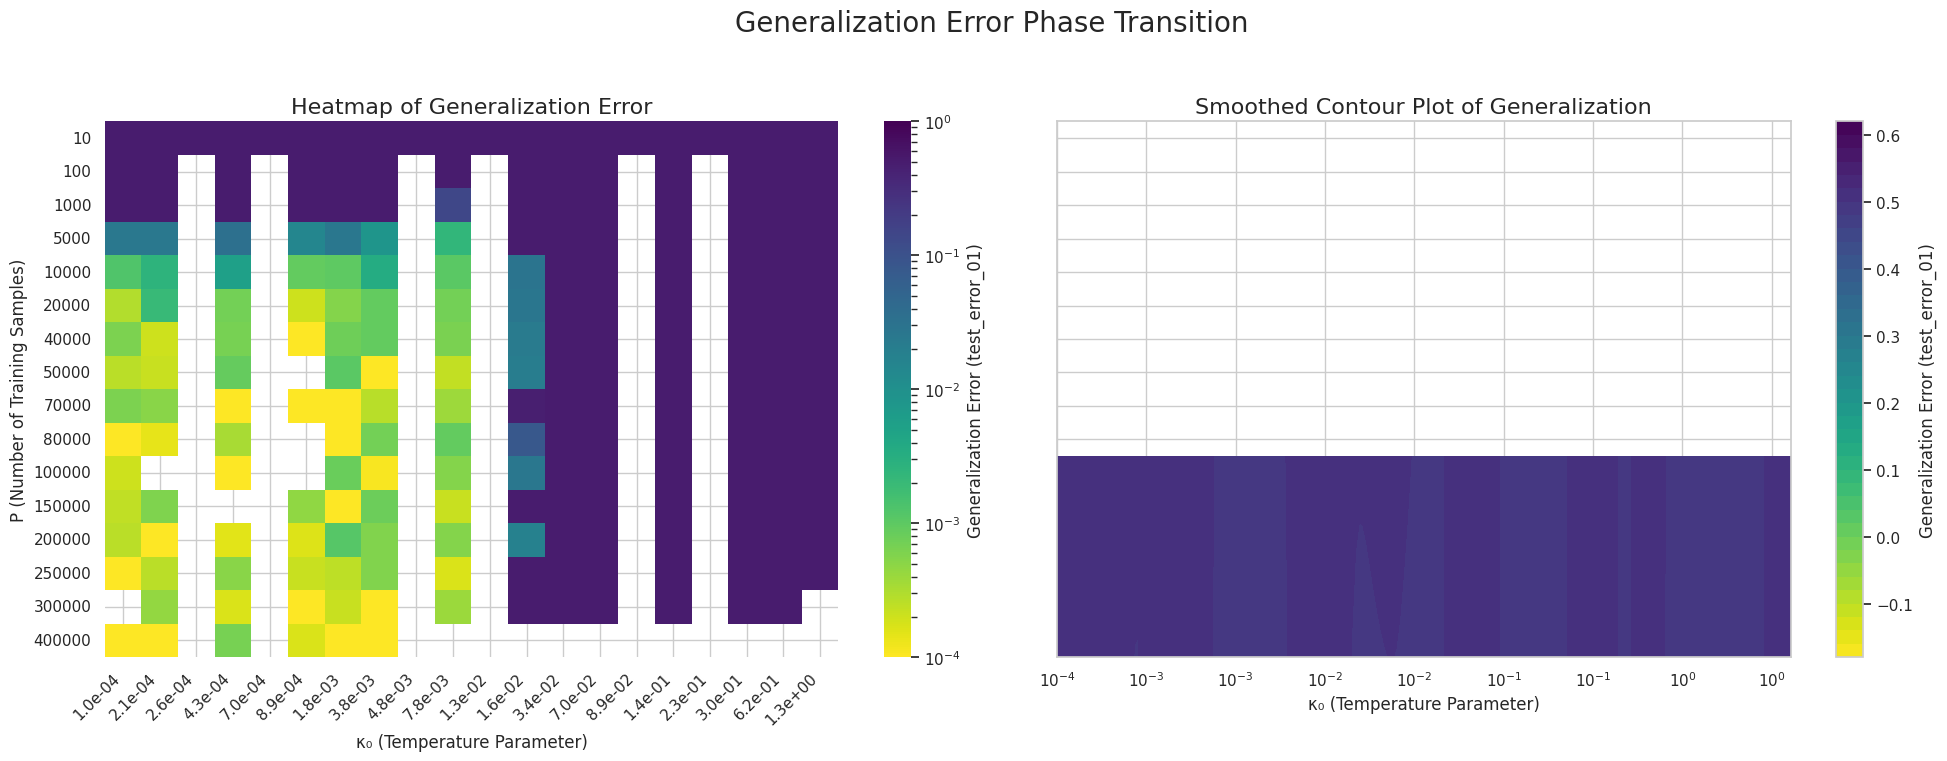

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatter, FuncFormatter
import seaborn as sns
from scipy.interpolate import griddata

def plot_phase_transition(json_path):
    """
    Loads experiment results from a JSON file and creates two plots:
    1. A direct heatmap of the generalization error.
    2. A smoothed contour plot to visualize the phase transition.

    Args:
        json_path (str or Path): The path to the training_results.json file.
    """
    # --- 1. Load and Preprocess Data ---
    try:
        with open(json_path, 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file was not found at {json_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Could not decode the JSON file. It might be empty or corrupted.")
        return

    if not results:
        print("The results file is empty. No data to plot.")
        return
        
    # Convert to a pandas DataFrame for easier manipulation
    df = pd.DataFrame(results)

    # Ensure required columns exist
    required_cols = {'P', 'kappa_0', 'test_error_01'}
    if not required_cols.issubset(df.columns):
        print(f"Error: The JSON file must contain the columns: {required_cols}")
        return

    # Drop any rows with NaN values in the test error (from diverged runs)
    df.dropna(subset=['test_error_01'], inplace=True)
    
    # --- 2. Create Plots ---
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    fig.suptitle('Generalization Error Phase Transition', fontsize=20)

    # --- 3. Plot 1: Standard Heatmap ---
    try:
        # Pivot the data to create a grid for the heatmap
        heatmap_data = df.pivot(index='P', columns='kappa_0', values='test_error_01')
        # Sort columns to ensure kappa_0 is in order
        heatmap_data = heatmap_data.sort_index(axis=1)
        
        # Use a perceptually uniform colormap
        cmap = "viridis_r" # _r reverses the map (lower is better)
        
        sns.heatmap(
            heatmap_data,
            ax=axes[0],
            cmap=cmap,
            cbar_kws={'label': 'Generalization Error (test_error_01)'},
            norm=mcolors.LogNorm(vmin=df['test_error_01'].min() + 1e-4, vmax=1.0) # Log color scale
        )
        axes[0].set_title('Heatmap of Generalization Error', fontsize=16)
        axes[0].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        axes[0].set_ylabel('P (Number of Training Samples)', fontsize=12)
        # Format x-axis ticks for better readability
        axes[0].set_xticklabels([f'{float(t.get_text()):.1e}' for t in axes[0].get_xticklabels()], rotation=45, ha='right')

    except Exception as e:
        axes[0].text(0.5, 0.5, f"Could not generate heatmap.\nError: {e}", ha='center', va='center')


    # --- 4. Plot 2: Smoothed Contour Plot ---
    try:
        # Prepare data points for interpolation
        # We use log of kappa for smoother interpolation in log space
        x = np.log10(df['kappa_0'])
        y = df['P']
        z = df['test_error_01']

        # Create a grid to interpolate onto
        xi = np.linspace(x.min(), x.max(), 200)
        yi = np.linspace(y.min(), y.max(), 200)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolate the data
        zi = griddata((x, y), z, (xi, yi), method='cubic')

        # Plot the filled contour
        contour = axes[1].contourf(xi, yi, zi, levels=50, cmap=cmap)
        axes[1].set_title('Smoothed Contour Plot of Generalization', fontsize=16)
        axes[1].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        
        # Format the x-axis to show original kappa values instead of log10
        def log_to_val(tick_val, pos):
            return f"$10^{{{int(tick_val)}}}$"
        
        formatter = FuncFormatter(log_to_val)
        axes[1].xaxis.set_major_formatter(formatter)

        # Add a color bar
        fig.colorbar(contour, ax=axes[1], label='Generalization Error (test_error_01)')

    except Exception as e:
        axes[1].text(0.5, 0.5, f"Could not generate contour plot.\nError: {e}", ha='center', va='center')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


if __name__ == '__main__':
    # --- IMPORTANT ---
    # Replace this with the actual path to your results file
    results_file_path = '/home/goring/mean_field_langevin/Langevin_training/results/d30_k4_3107_gridgamma1/training_results.json'
    
    plot_phase_transition(results_file_path)



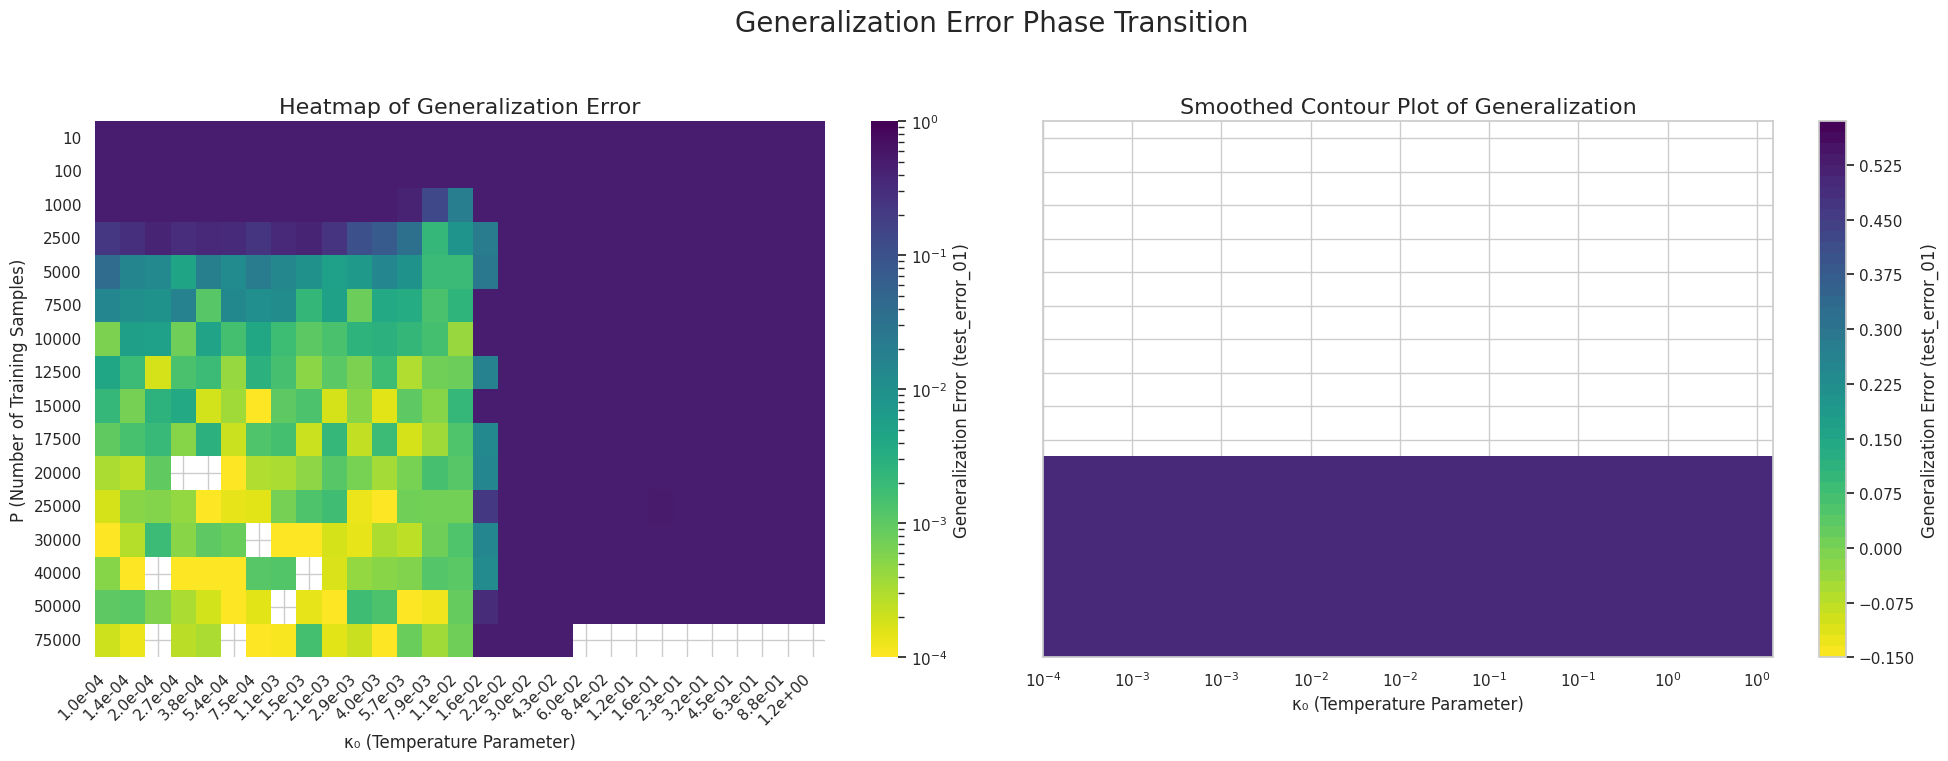

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatter, FuncFormatter
import seaborn as sns
from scipy.interpolate import griddata

def plot_phase_transition(json_path):
    """
    Loads experiment results from a JSON file and creates two plots:
    1. A direct heatmap of the generalization error.
    2. A smoothed contour plot to visualize the phase transition.

    Args:
        json_path (str or Path): The path to the training_results.json file.
    """
    # --- 1. Load and Preprocess Data ---
    try:
        with open(json_path, 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file was not found at {json_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Could not decode the JSON file. It might be empty or corrupted.")
        return

    if not results:
        print("The results file is empty. No data to plot.")
        return
        
    # Convert to a pandas DataFrame for easier manipulation
    df = pd.DataFrame(results)

    # Ensure required columns exist
    required_cols = {'P', 'kappa_0', 'test_error_01'}
    if not required_cols.issubset(df.columns):
        print(f"Error: The JSON file must contain the columns: {required_cols}")
        return

    # Drop any rows with NaN values in the test error (from diverged runs)
    df.dropna(subset=['test_error_01'], inplace=True)
    
    # --- 2. Create Plots ---
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    fig.suptitle('Generalization Error Phase Transition', fontsize=20)

    # --- 3. Plot 1: Standard Heatmap ---
    try:
        # Pivot the data to create a grid for the heatmap
        heatmap_data = df.pivot(index='P', columns='kappa_0', values='test_error_01')
        # Sort columns to ensure kappa_0 is in order
        heatmap_data = heatmap_data.sort_index(axis=1)
        
        # Use a perceptually uniform colormap
        cmap = "viridis_r" # _r reverses the map (lower is better)
        
        sns.heatmap(
            heatmap_data,
            ax=axes[0],
            cmap=cmap,
            cbar_kws={'label': 'Generalization Error (test_error_01)'},
            norm=mcolors.LogNorm(vmin=df['test_error_01'].min() + 1e-4, vmax=1.0) # Log color scale
        )
        axes[0].set_title('Heatmap of Generalization Error', fontsize=16)
        axes[0].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        axes[0].set_ylabel('P (Number of Training Samples)', fontsize=12)
        # Format x-axis ticks for better readability
        axes[0].set_xticklabels([f'{float(t.get_text()):.1e}' for t in axes[0].get_xticklabels()], rotation=45, ha='right')

    except Exception as e:
        axes[0].text(0.5, 0.5, f"Could not generate heatmap.\nError: {e}", ha='center', va='center')


    # --- 4. Plot 2: Smoothed Contour Plot ---
    try:
        # Prepare data points for interpolation
        # We use log of kappa for smoother interpolation in log space
        x = np.log10(df['kappa_0'])
        y = df['P']
        z = df['test_error_01']

        # Create a grid to interpolate onto
        xi = np.linspace(x.min(), x.max(), 200)
        yi = np.linspace(y.min(), y.max(), 200)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolate the data
        zi = griddata((x, y), z, (xi, yi), method='cubic')

        # Plot the filled contour
        contour = axes[1].contourf(xi, yi, zi, levels=50, cmap=cmap)
        axes[1].set_title('Smoothed Contour Plot of Generalization', fontsize=16)
        axes[1].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        
        # Format the x-axis to show original kappa values instead of log10
        def log_to_val(tick_val, pos):
            return f"$10^{{{int(tick_val)}}}$"
        
        formatter = FuncFormatter(log_to_val)
        axes[1].xaxis.set_major_formatter(formatter)

        # Add a color bar
        fig.colorbar(contour, ax=axes[1], label='Generalization Error (test_error_01)')

    except Exception as e:
        axes[1].text(0.5, 0.5, f"Could not generate contour plot.\nError: {e}", ha='center', va='center')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



if __name__ == '__main__':
    # --- IMPORTANT ---
    # Replace this with the actual path to your results file
    results_file_path = '/home/goring/mean_field_langevin/Langevin_training/results/d30_k4_0708_grid/training_results.json'
    
    plot_phase_transition(results_file_path)



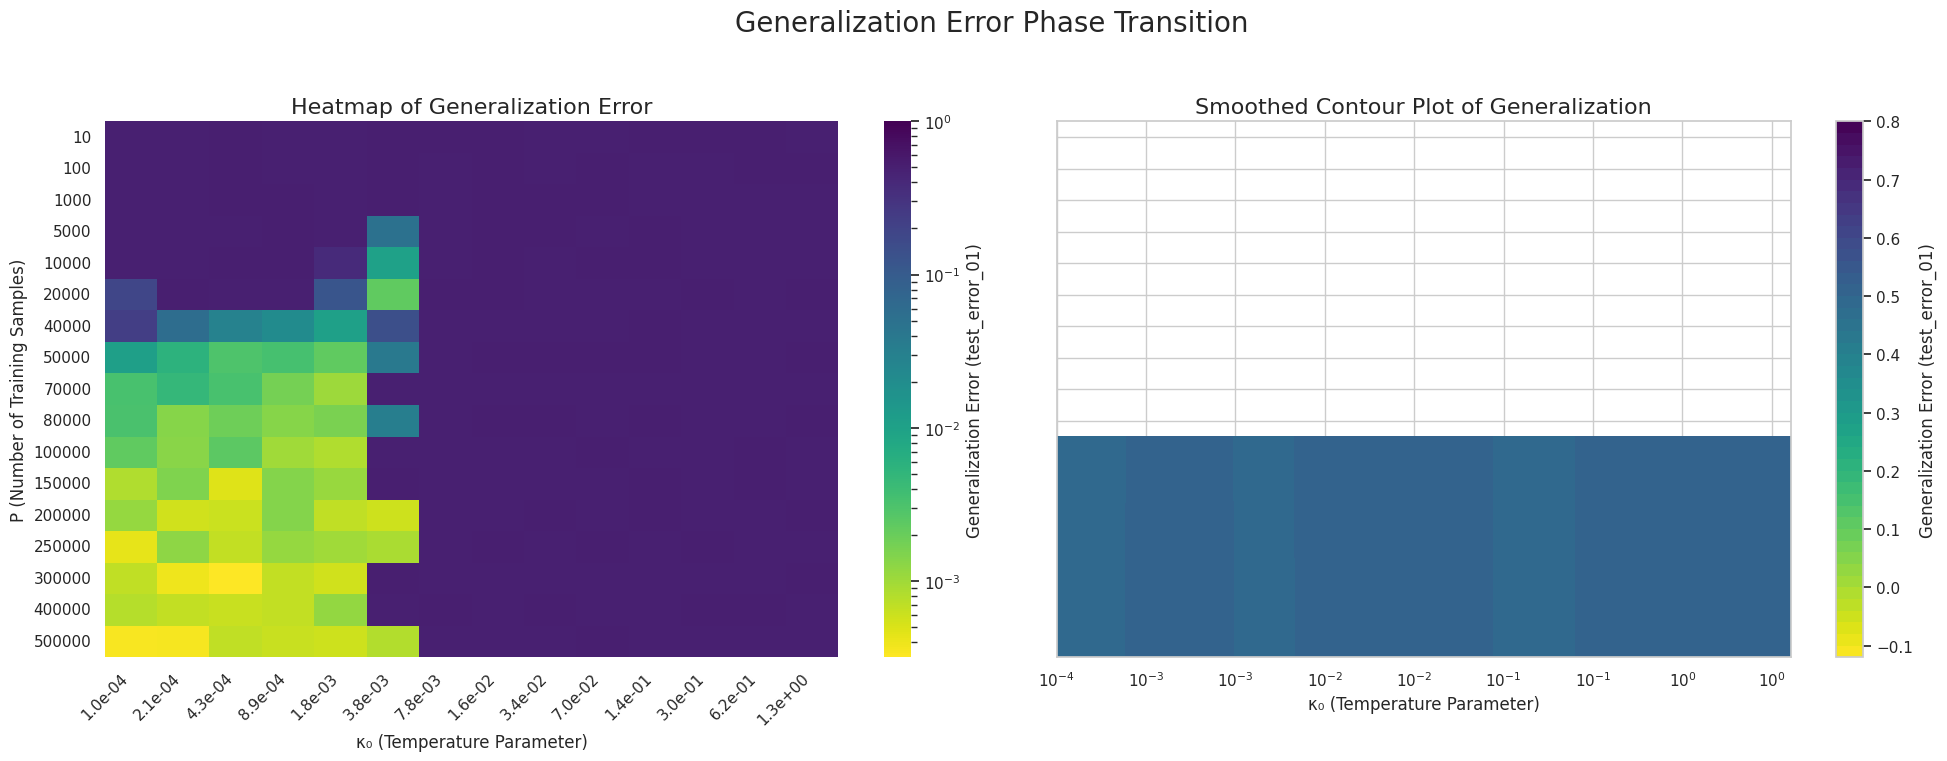

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatter, FuncFormatter
import seaborn as sns
from scipy.interpolate import griddata

def plot_phase_transition(json_path):
    """
    Loads experiment results from a JSON file and creates two plots:
    1. A direct heatmap of the generalization error.
    2. A smoothed contour plot to visualize the phase transition.

    Args:
        json_path (str or Path): The path to the training_results.json file.
    """
    # --- 1. Load and Preprocess Data ---
    try:
        with open(json_path, 'r') as f:
            results = json.load(f)
    except FileNotFoundError:
        print(f"Error: The file was not found at {json_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Could not decode the JSON file. It might be empty or corrupted.")
        return

    if not results:
        print("The results file is empty. No data to plot.")
        return
        
    # Convert to a pandas DataFrame for easier manipulation
    df = pd.DataFrame(results)

    # Ensure required columns exist
    required_cols = {'P', 'kappa_0', 'test_error_01'}
    if not required_cols.issubset(df.columns):
        print(f"Error: The JSON file must contain the columns: {required_cols}")
        return

    # Drop any rows with NaN values in the test error (from diverged runs)
    df.dropna(subset=['test_error_01'], inplace=True)
    
    # --- 2. Create Plots ---
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    fig.suptitle('Generalization Error Phase Transition', fontsize=20)

    # --- 3. Plot 1: Standard Heatmap ---
    try:
        # Pivot the data to create a grid for the heatmap
        heatmap_data = df.pivot(index='P', columns='kappa_0', values='test_error_01')
        # Sort columns to ensure kappa_0 is in order
        heatmap_data = heatmap_data.sort_index(axis=1)
        
        # Use a perceptually uniform colormap
        cmap = "viridis_r" # _r reverses the map (lower is better)
        
        sns.heatmap(
            heatmap_data,
            ax=axes[0],
            cmap=cmap,
            cbar_kws={'label': 'Generalization Error (test_error_01)'},
            norm=mcolors.LogNorm(vmin=df['test_error_01'].min() + 1e-4, vmax=1.0) # Log color scale
        )
        axes[0].set_title('Heatmap of Generalization Error', fontsize=16)
        axes[0].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        axes[0].set_ylabel('P (Number of Training Samples)', fontsize=12)
        # Format x-axis ticks for better readability
        axes[0].set_xticklabels([f'{float(t.get_text()):.1e}' for t in axes[0].get_xticklabels()], rotation=45, ha='right')

    except Exception as e:
        axes[0].text(0.5, 0.5, f"Could not generate heatmap.\nError: {e}", ha='center', va='center')


    # --- 4. Plot 2: Smoothed Contour Plot ---
    try:
        # Prepare data points for interpolation
        # We use log of kappa for smoother interpolation in log space
        x = np.log10(df['kappa_0'])
        y = df['P']
        z = df['test_error_01']

        # Create a grid to interpolate onto
        xi = np.linspace(x.min(), x.max(), 200)
        yi = np.linspace(y.min(), y.max(), 200)
        xi, yi = np.meshgrid(xi, yi)

        # Interpolate the data
        zi = griddata((x, y), z, (xi, yi), method='cubic')

        # Plot the filled contour
        contour = axes[1].contourf(xi, yi, zi, levels=50, cmap=cmap)
        axes[1].set_title('Smoothed Contour Plot of Generalization', fontsize=16)
        axes[1].set_xlabel('κ₀ (Temperature Parameter)', fontsize=12)
        
        # Format the x-axis to show original kappa values instead of log10
        def log_to_val(tick_val, pos):
            return f"$10^{{{int(tick_val)}}}$"
        
        formatter = FuncFormatter(log_to_val)
        axes[1].xaxis.set_major_formatter(formatter)

        # Add a color bar
        fig.colorbar(contour, ax=axes[1], label='Generalization Error (test_error_01)')

    except Exception as e:
        axes[1].text(0.5, 0.5, f"Could not generate contour plot.\nError: {e}", ha='center', va='center')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



if __name__ == '__main__':
    # --- IMPORTANT ---
    # Replace this with the actual path to your results file
    results_file_path = '/home/goring/mean_field_langevin/Langevin_training/results/d40_k6_0208_grid/training_results.json'
    
    plot_phase_transition(results_file_path)



/tmp/ipykernel_2553872/253417788.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(P_vals))


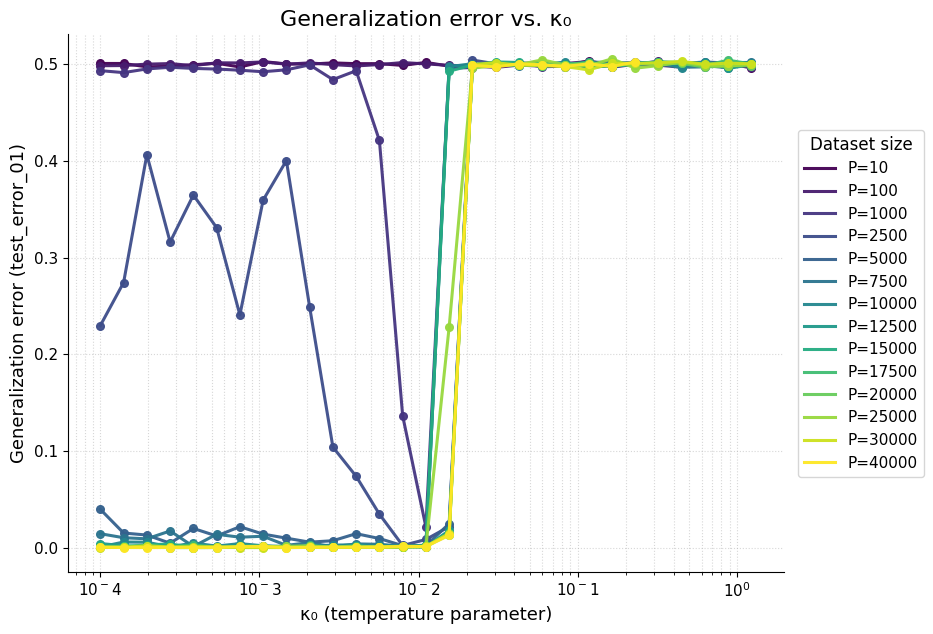

In [1]:
# --- set your path here ---
RESULTS_FILE = '/home/goring/mean_field_langevin/Langevin_training/results/d30_k4_0708_grid/training_results.json'

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_err_vs_kappa_lines(json_path,
                            logx=True,
                            logy=False,
                            cmap_name='viridis',
                            linewidth=2.0,
                            markersize=5,
                            alpha=0.95):
    # Load
    with open(json_path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results)
    needed = {'P','kappa_0','test_error_01'}
    if not needed.issubset(df.columns):
        raise ValueError(f"Missing columns. Need {needed}")

    # Clean + average duplicates at identical (P, kappa_0)
    df = (df[['P','kappa_0','test_error_01']]
          .dropna(subset=['test_error_01'])
          .groupby(['P','kappa_0'], as_index=False)
          .agg(test_error_01=('test_error_01','mean')))
    df['P'] = df['P'].astype(float)
    df['kappa_0'] = df['kappa_0'].astype(float)
    df['test_error_01'] = df['test_error_01'].astype(float)

    # Ensure kappa > 0 for log-x
    if logx and (df['kappa_0'] <= 0).any():
        raise ValueError("kappa_0 must be > 0 when logx=True.")

    # Unique P values and colormap
    P_vals = np.sort(df['P'].unique())
    cmap = plt.cm.get_cmap(cmap_name, len(P_vals))

    # ICML-ish minimalist style
    plt.rcParams.update({
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 16,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
    })

    fig, ax = plt.subplots(figsize=(9.5, 6.5))

    for i, P in enumerate(P_vals):
        sub = df[df['P'] == P].sort_values('kappa_0')
        x = sub['kappa_0'].values
        y = sub['test_error_01'].values

        color = cmap(i)
        label = f"P={int(P) if float(P).is_integer() else P:g}"

        # line + markers (no smoothing)
        ax.plot(x, y, '-', color=color, linewidth=linewidth, alpha=alpha, label=label)
        ax.plot(x, y, 'o', color=color, markersize=markersize, alpha=alpha)

    # Axes scales
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    ax.set_xlabel('κ₀ (temperature parameter)')
    ax.set_ylabel('Generalization error (test_error_01)')
    ax.set_title('Generalization error vs. κ₀')

    # Pretty 10^n ticks on x if logx
    if logx:
        def log_to_tex(val, pos):
            try:
                p = int(np.round(np.log10(val)))
                if np.isclose(10**p, val):
                    return rf"$10^{p}$"
            except Exception:
                pass
            return ""
        ax.xaxis.set_major_formatter(FuncFormatter(log_to_tex))

    # Grid + clean spines
    ax.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.5)
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

    # Legend (outside right)
    ax.legend(title="Dataset size", loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

    plt.tight_layout()
    plt.show()

# run it
plot_err_vs_kappa_lines(
    RESULTS_FILE,
    logx=True,   # set False for linear x
    logy=False,  # set True if you want log y
    cmap_name='viridis',
    linewidth=2.2,
    markersize=5.5,
    alpha=0.95
)


/tmp/ipykernel_2682670/621327675.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, len(P_vals))


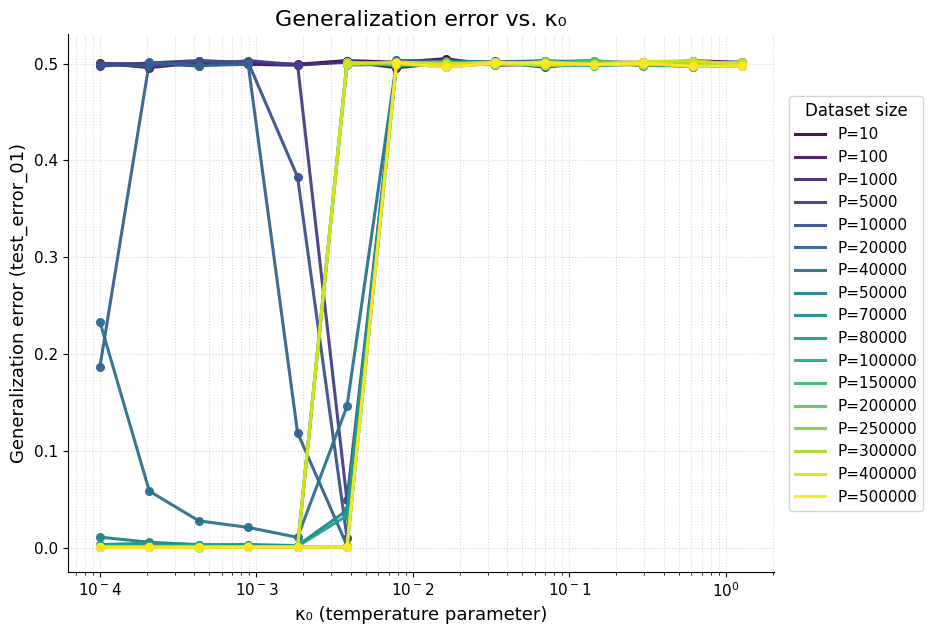

In [1]:
# --- set your path here ---
RESULTS_FILE = '/home/goring/mean_field_langevin/Langevin_training/results/d40_k6_0208_grid/training_results.json'

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_err_vs_kappa_lines(json_path,
                            logx=True,
                            logy=False,
                            cmap_name='viridis',
                            linewidth=2.0,
                            markersize=5,
                            alpha=0.95):
    # Load
    with open(json_path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results)
    needed = {'P','kappa_0','test_error_01'}
    if not needed.issubset(df.columns):
        raise ValueError(f"Missing columns. Need {needed}")

    # Clean + average duplicates at identical (P, kappa_0)
    df = (df[['P','kappa_0','test_error_01']]
          .dropna(subset=['test_error_01'])
          .groupby(['P','kappa_0'], as_index=False)
          .agg(test_error_01=('test_error_01','mean')))
    df['P'] = df['P'].astype(float)
    df['kappa_0'] = df['kappa_0'].astype(float)
    df['test_error_01'] = df['test_error_01'].astype(float)

    # Ensure kappa > 0 for log-x
    if logx and (df['kappa_0'] <= 0).any():
        raise ValueError("kappa_0 must be > 0 when logx=True.")

    # Unique P values and colormap
    P_vals = np.sort(df['P'].unique())
    cmap = plt.cm.get_cmap(cmap_name, len(P_vals))

    # ICML-ish minimalist style
    plt.rcParams.update({
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 16,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
    })

    fig, ax = plt.subplots(figsize=(9.5, 6.5))

    for i, P in enumerate(P_vals):
        sub = df[df['P'] == P].sort_values('kappa_0')
        x = sub['kappa_0'].values
        y = sub['test_error_01'].values

        color = cmap(i)
        label = f"P={int(P) if float(P).is_integer() else P:g}"

        # line + markers (no smoothing)
        ax.plot(x, y, '-', color=color, linewidth=linewidth, alpha=alpha, label=label)
        ax.plot(x, y, 'o', color=color, markersize=markersize, alpha=alpha)

    # Axes scales
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    ax.set_xlabel('κ₀ (temperature parameter)')
    ax.set_ylabel('Generalization error (test_error_01)')
    ax.set_title('Generalization error vs. κ₀')

    # Pretty 10^n ticks on x if logx
    if logx:
        def log_to_tex(val, pos):
            try:
                p = int(np.round(np.log10(val)))
                if np.isclose(10**p, val):
                    return rf"$10^{p}$"
            except Exception:
                pass
            return ""
        ax.xaxis.set_major_formatter(FuncFormatter(log_to_tex))

    # Grid + clean spines
    ax.grid(True, which='both', linestyle=':', linewidth=0.8, alpha=0.5)
    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

    # Legend (outside right)
    ax.legend(title="Dataset size", loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

    plt.tight_layout()
    plt.show()

# run it
plot_err_vs_kappa_lines(
    RESULTS_FILE,
    logx=True,   # set False for linear x
    logy=False,  # set True if you want log y
    cmap_name='viridis',
    linewidth=2.2,
    markersize=5.5,
    alpha=0.95
)


In [ ]:
###### new plots

Loaded 102 rows


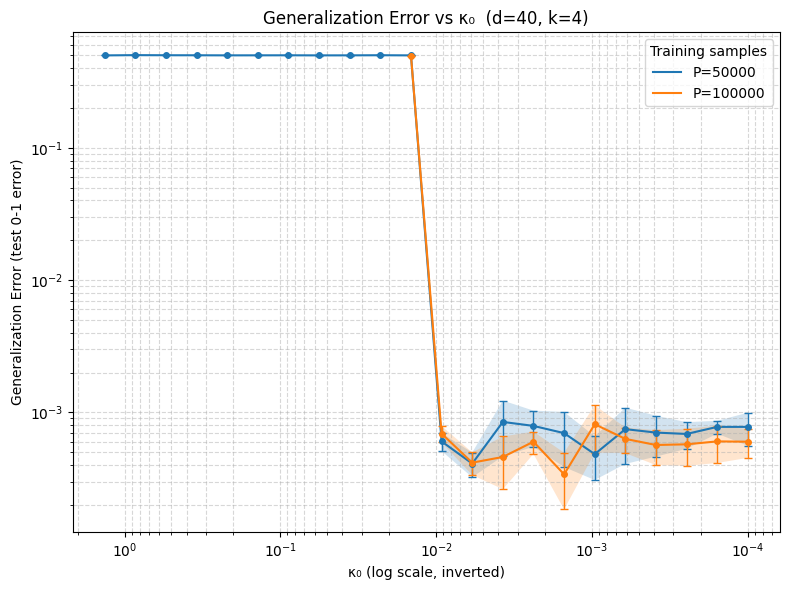

In [4]:
import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- set this to your results root directory ---
base_save_dir = Path("/home/goring/mean_field_langevin/Langevin_training/results/d40_k4_1708_grid")

def load_results(base_dir: Path) -> pd.DataFrame:
    rows = []
    for sub in base_dir.glob("d*_k*"):
        f = sub / "training_results.json"
        if not f.exists():
            continue
        try:
            with open(f, "r") as fh:
                data = json.load(fh)
            rows.extend(data)
        except json.JSONDecodeError:
            print(f"⚠️ Could not parse {f}")
    df = pd.DataFrame(rows)
    if df.empty:
        print("No results found.")
        return df
    # ensure numeric types
    for col in ["d", "k", "P"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    for col in ["kappa_0", "test_error_01"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    # drop rows without needed fields
    df = df.dropna(subset=["d", "k", "P", "kappa_0", "test_error_01"])
    # guard against floating-grouping quirks by rounding kappa_0
    df["kappa_rounded"] = df["kappa_0"].round(12)
    return df

def plot_generalization(df: pd.DataFrame):
    if df.empty:
        return
    for (d, k), df_sub in df.groupby(["d", "k"]):
        fig, ax = plt.subplots(figsize=(8, 6))

        for P, df_p in df_sub.groupby("P"):
            # aggregate across exp_id at each kappa
            grp = df_p.groupby("kappa_rounded")["test_error_01"]
            means = grp.mean().rename("mean")
            stds  = grp.std(ddof=1).rename("std")       # sample std
            ns    = grp.count().rename("n")
            sems  = (stds / np.sqrt(ns)).rename("sem")  # standard error of the mean

            agg = pd.concat([means, stds, sems], axis=1).reset_index()
            # sort by kappa increasing (we'll invert axis after)
            agg = agg.sort_values("kappa_rounded")

            # line
            (line,) = ax.plot(agg["kappa_rounded"].to_numpy(),
                              agg["mean"].to_numpy(),
                              label=f"P={int(P)}")
            color = line.get_color()

            # ribbon: mean ± 1 SEM
            upper = agg["mean"] + agg["sem"].fillna(0)
            lower = agg["mean"] - agg["sem"].fillna(0)
            ax.fill_between(agg["kappa_rounded"].to_numpy(),
                            lower.to_numpy(),
                            upper.to_numpy(),
                            alpha=0.2)

            # points with vertical error bars (SEM)
            ax.errorbar(agg["kappa_rounded"].to_numpy(),
                        agg["mean"].to_numpy(),
                        yerr=agg["sem"].fillna(0).to_numpy(),
                        fmt="o", ms=4, lw=1, capsize=3, color=color, ecolor=color)

        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.invert_xaxis()  # invert x-axis as requested
        ax.set_xlabel("κ₀ (log scale, inverted)")
        ax.set_ylabel("Generalization Error (test 0-1 error)")
        ax.set_title(f"Generalization Error vs κ₀  (d={int(d)}, k={int(k)})")
        ax.grid(True, which="both", ls="--", alpha=0.5)
        ax.legend(title="Training samples")
        plt.tight_layout()
        plt.show()

df = load_results(base_save_dir)
print(f"Loaded {len(df)} rows")
plot_generalization(df)
